<a href="https://colab.research.google.com/github/ssaine95/CoderHouseDataScience/blob/main/Pruebas_Modelos_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2. Importación del Dataset**

In [1]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.3 MB/s eta 0:00:00


In [2]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import numpy as np
import statsmodels.formula.api as sm
import chart_studio.plotly as py
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Coderhouse'
df3 = pd.read_excel('footballData2.xlsx')
print(df3)

/content/drive/MyDrive/Coderhouse
       sofifa_id         short_name                            long_name  age  \
0         158023           L. Messi      Lionel AndrÃ©s Messi Cuccittini   33   
1          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35   
2         200389           J. Oblak                            Jan Oblak   27   
3         188545     R. Lewandowski                   Robert Lewandowski   31   
4         190871          Neymar Jr       Neymar da Silva Santos JÃºnior   28   
...          ...                ...                                  ...  ...   
18714     256679          K. Angulo                         Kevin Angulo   24   
18715     257710     Zhang Mengxuan                       Mengxuan Zhang   21   
18716     250989      Wang Zhenghao                            çŽ‹æ”¿è±ª   20   
18717     257697        Chen Zitong                          Zitong Chen   23   
18718     257936           Song Yue                             Yue Song   

In [5]:
df3.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,gk_speed,gk_positioning,attacking_finishing,skill_dribbling,movement_acceleration,movement_sprint_speed,power_shot_power,mentality_aggression,defending_standing_tackle,goalkeeping_handling
0,158023,L. Messi,Lionel AndrÃ©s Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,0,0,95,96,91,80,86,44,35,11
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,0,0,95,88,87,91,94,63,32,11
2,200389,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,AtlÃ©tico Madrid,Spain Primera Division,...,52,90,11,12,43,60,59,34,12,92
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern MÃ¼nchen,German 1. Bundesliga,...,0,0,94,85,77,78,89,81,42,6
4,190871,Neymar Jr,Neymar da Silva Santos JÃºnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,0,0,87,95,94,89,80,51,30,9


In [6]:
df3.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'player_positions2', 'position_segment', 'position_desc',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_finishing',
       'skill_dribbling', 'movement_acceleration', 'movement_sprint_speed',
       'power_shot_power', 'mentality_aggression', 'defending_standing_tackle',
       'goalkeeping_handling'],
      dtype='object')

In [7]:
print(df3.dtypes)

sofifa_id                             int64
short_name                           object
long_name                            object
age                                   int64
dob                          datetime64[ns]
height_cm                             int64
weight_kg                             int64
nationality                          object
club_name                            object
league_name                          object
league_rank                           int64
overall                               int64
potential                             int64
value_eur                             int64
wage_eur                              int64
player_positions                     object
player_positions2                    object
position_segment                     object
position_desc                        object
preferred_foot                       object
international_reputation              int64
weak_foot                             int64
skill_moves                     

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sofifa_id                  18719 non-null  int64         
 1   short_name                 18719 non-null  object        
 2   long_name                  18719 non-null  object        
 3   age                        18719 non-null  int64         
 4   dob                        18719 non-null  datetime64[ns]
 5   height_cm                  18719 non-null  int64         
 6   weight_kg                  18719 non-null  int64         
 7   nationality                18719 non-null  object        
 8   club_name                  18719 non-null  object        
 9   league_name                18719 non-null  object        
 10  league_rank                18719 non-null  int64         
 11  overall                    18719 non-null  int64         
 12  pote

## FEATURE ENGINEERING

In [59]:
df3_feature = df3[['age',
 'height_cm',
 'overall',
 'potential',
 'value_eur',
 'dribbling',
 'defending',
 'physic',
 'movement_acceleration',
 'mentality_aggression','wage_eur','preferred_foot','position_segment']]

In [60]:
# Crear una nueva característica que indique el sueldo anual
df3_feature['annual_wage_eur'] = df3_feature['wage_eur'] * 12
# Codificar la característica 'estado_civil' utilizando one-hot encoding
df3_feature = pd.get_dummies(df3_feature, columns=['position_segment'])
df3_feature = pd.get_dummies(df3_feature, columns=['preferred_foot'])

<ipython-input-60-435303d249de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_feature['annual_wage_eur'] = df3_feature['wage_eur'] * 12


In [61]:
df3_feature.columns

Index(['age', 'height_cm', 'overall', 'potential', 'value_eur', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'mentality_aggression',
       'wage_eur', 'annual_wage_eur', 'position_segment_Defender',
       'position_segment_Forward', 'position_segment_Goalkeeper',
       'position_segment_Midfielder', 'preferred_foot_Left',
       'preferred_foot_Right'],
      dtype='object')

## Prueba **outliers** con Isolation Forest

In [62]:
df3_feature_2 = df3[['age',
 'height_cm',
 'overall',
 'potential',
 'value_eur',
 'dribbling',
 'defending',
 'physic',
 'movement_acceleration',
 'mentality_aggression','wage_eur']]

In [63]:
df3_feature_3 = df3 [['age','height_cm','weight_kg','overall', 'potential', 'value_eur', 'wage_eur','skill_moves','pace', 'shooting', 'passing', 'dribbling','defending', 'physic','attacking_finishing','skill_dribbling', 'movement_acceleration','movement_sprint_speed','power_shot_power', 'mentality_aggression']]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


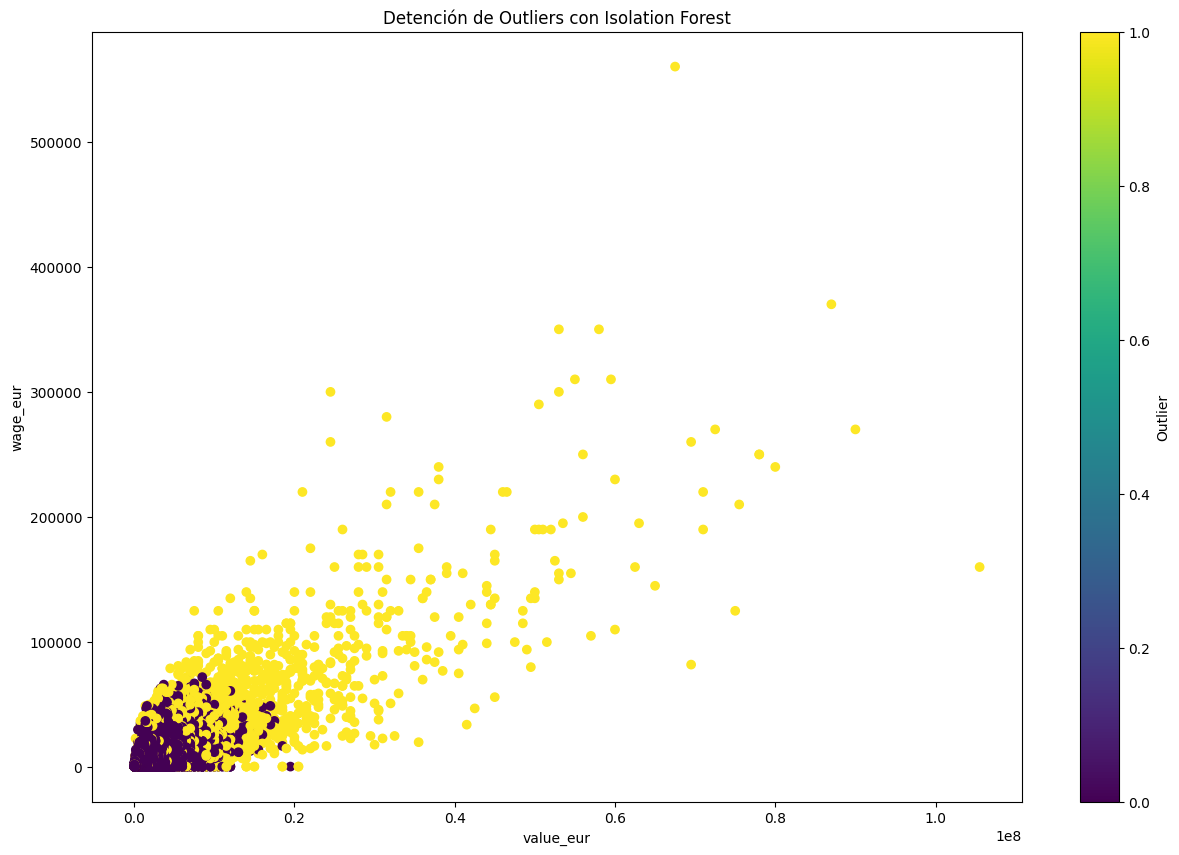

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # contamination representa la proporción esperada de valores atípicos
model.fit(df3_feature)

# Predecir outliers
outliers = model.predict(df3_feature)
outliers_mask = outliers == -1  # Filtrar los valores que son considerados outliers

# Visualizar los outliers
plt.scatter(df3_feature['value_eur'], df3_feature['wage_eur'], c=outliers_mask, cmap='viridis')
plt.xlabel('value_eur')
plt.ylabel('wage_eur')
plt.title('Detención de Outliers con Isolation Forest')
plt.colorbar(label='Outlier')
plt.show()


In [65]:
print(outliers)

[-1 -1 -1 ...  1  1  1]


In [66]:
print(outliers_mask)

[ True  True  True ... False False False]


In [67]:
df_clean = df3_feature[~outliers_mask]

In [108]:
print(df_clean)

       age  height_cm  overall  potential  value_eur  dribbling  defending  \
324     32        183       81         81   13500000         81         72   
353     32        182       81         81   14000000         83         39   
362     24        180       81         81   19500000         82         52   
401     25        172       80         83   18500000         85         55   
408     25        183       80         83   16500000         61         82   
...    ...        ...      ...        ...        ...        ...        ...   
18714   24        176       47         52      40000         47         41   
18715   21        177       47         52      35000         27         50   
18716   20        185       47         51      35000         36         45   
18717   23        186       47         51      40000         48         44   
18718   28        185       47         47      30000         46         40   

       physic  movement_acceleration  mentality_aggression  wag

In [69]:
model1 = 'value_eur~potential+overall'
lm1   = sm.ols(formula = model1, data = df_clean).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                 1.010e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:23:00   Log-Likelihood:            -2.6126e+05
No. Observations:               16847   AIC:                         5.225e+05
Df Residuals:                   16844   BIC:                         5.226e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.711e+07   1.39e+05   -123.283      0.0

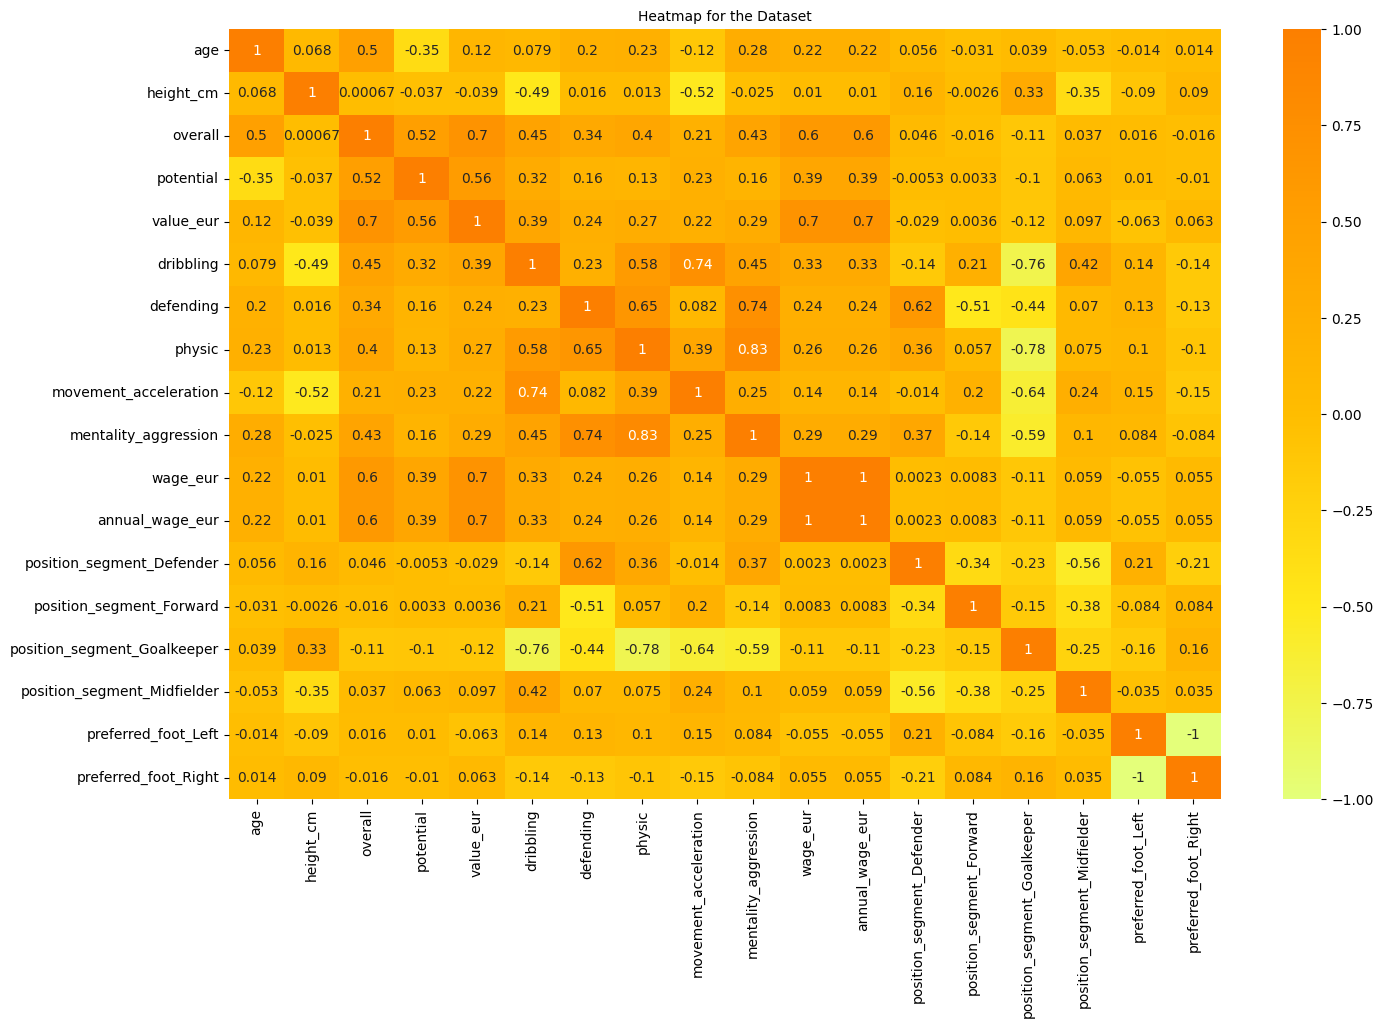

In [70]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (16, 10)

sns.heatmap(df_clean.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 10)
plt.show()

## Prueba **outliers** con DBSCAN

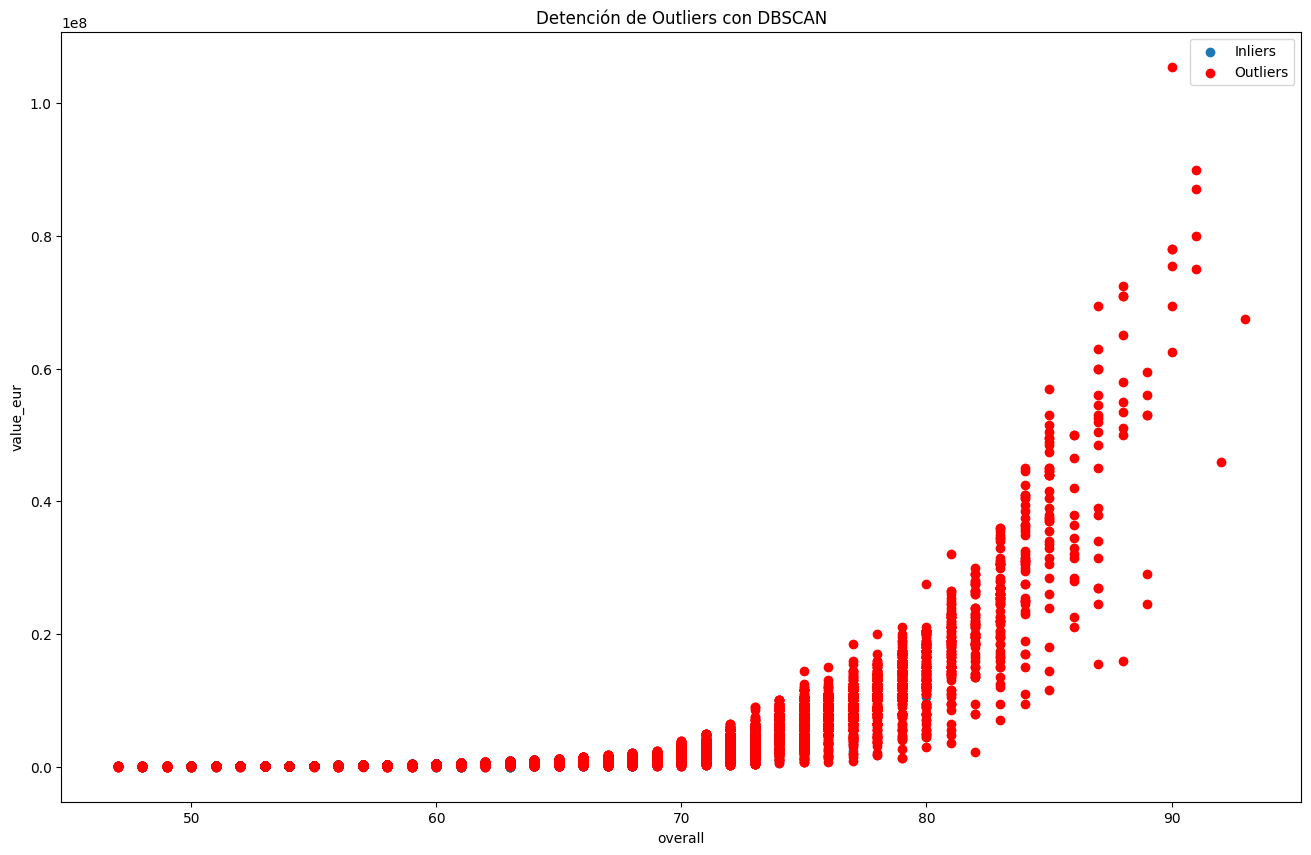

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3_feature)

# Entrenar el modelo DBSCAN
model = DBSCAN(eps=0.8, min_samples=4)  # eps es la distancia máxima entre dos muestras para ser consideradas vecinas
model.fit(df_scaled)

# Filtrar los outliers
outliers_mask = model.labels_ == -1

# Eliminar los outliers del DataFrame
df_clean_2 = df3_feature[~outliers_mask]

# Visualizar los resultados
plt.scatter(df_clean_2['overall'], df_clean_2['value_eur'], label='Inliers')
plt.scatter(df3_feature[outliers_mask]['overall'], df3_feature[outliers_mask]['value_eur'], color='red', label='Outliers')
plt.xlabel('overall')
plt.ylabel('value_eur')
plt.title('Detención de Outliers con DBSCAN')
plt.legend()
plt.show()

In [72]:
print(df_clean_2)

       age  height_cm  overall  potential  value_eur  dribbling  defending  \
440     31        181       80         80   10500000         77         77   
467     29        182       80         80   12000000         72         79   
475     29        184       80         80   12500000         73         80   
479     28        182       80         80   12500000         75         74   
573     26        177       79         80   13000000         75         71   
...    ...        ...      ...        ...        ...        ...        ...   
18705   18        179       47         65      60000         46         40   
18707   19        166       47         62      60000         46         40   
18711   23        170       47         55      45000         44         39   
18713   21        174       47         53      40000         47         43   
18714   24        176       47         52      40000         47         41   

       physic  movement_acceleration  mentality_aggression  wag

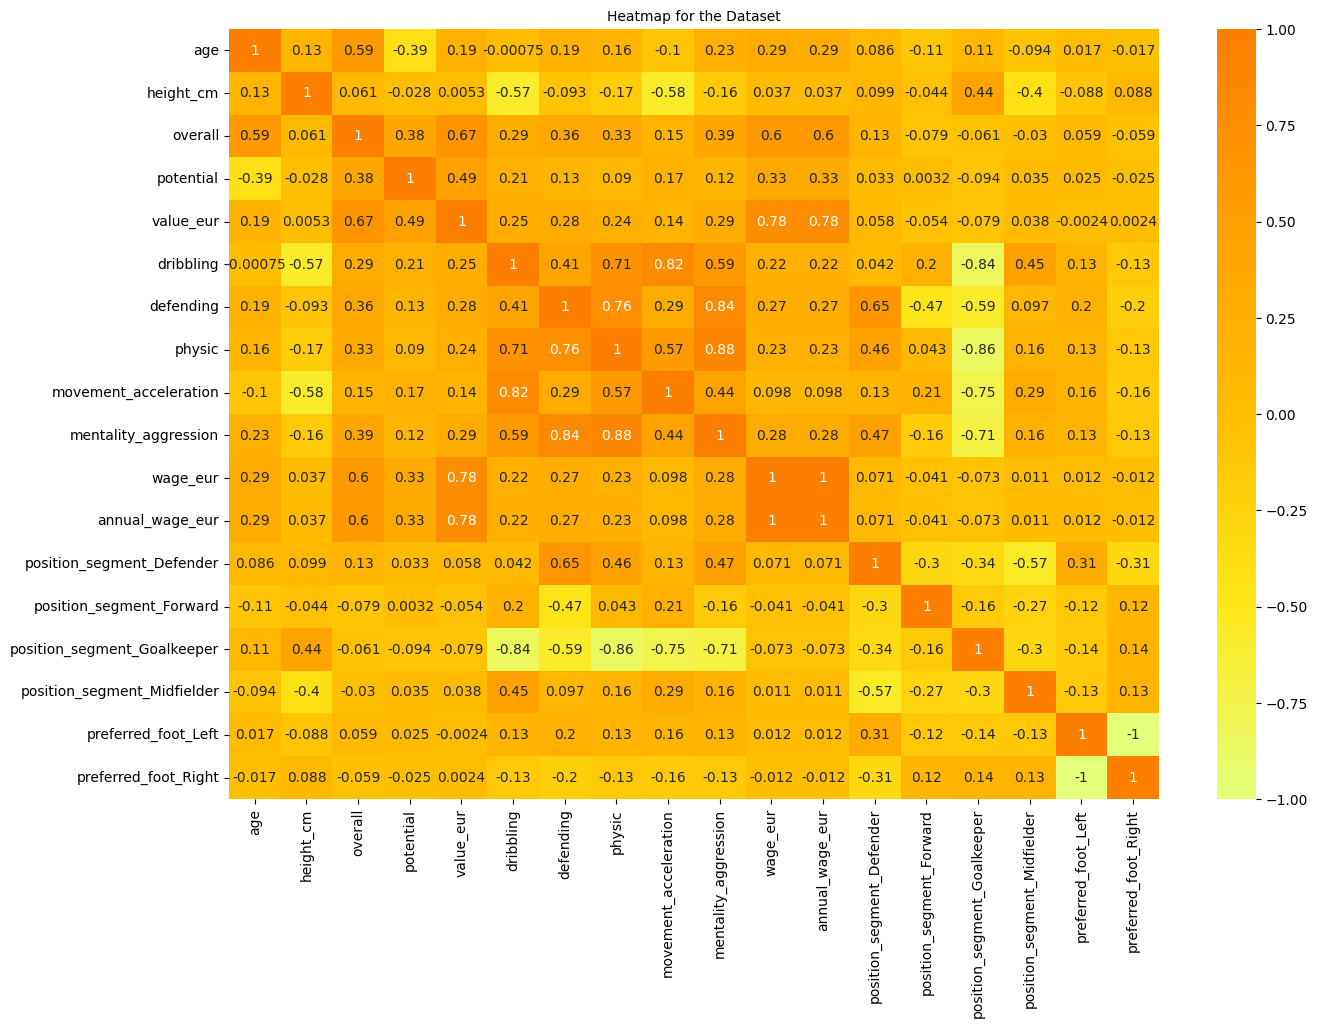

In [73]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(df_clean_2.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 10)
plt.show()

In [74]:
model1 = 'value_eur~overall'
lm1   = sm.ols(formula = model1, data = df_clean_2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     8506.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:23:10   Log-Likelihood:            -1.5562e+05
No. Observations:               10377   AIC:                         3.113e+05
Df Residuals:                   10375   BIC:                         3.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.505e+06   9.04e+04    -83.051      0.0

## **KFOLD Cross Validation Regresion Parte 2**

In [135]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#cross validation libs
from sklearn.model_selection import KFold, cross_val_score

In [136]:
X_ev3 = df3['value_eur'].values.reshape(-1, 1)

In [137]:
y2 = df3['overall']

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

# Instanciar el metodo con los kfold desados
kfold = KFold(3)

# Instanciar el modelo a entrenar
model = RandomForestRegressor()


# dividimos el conjunto de datos
# obtenemos los indices de cada splits
splits = kfold.split(X_ev3)





In [139]:
# Realizamos el for para iterar sobre los splits
# Recuerda que cada split tiene los indices de entrenamiento y test
scores = []

# utilizamos el metodo enumerate que retorna el indice
# del split y una tupla con (train, test) indices
for i, (train_index,test_index) in enumerate(splits) :

  if i == 0:
    print (f"Indices Train {train_index[0:5]} tamaño {len(train_index)}")
    print (f"Indices Test  {test_index [0:5]} tamaño {len(test_index)}")

  #Entrenamos con los indices de train
  model.fit(X_ev3[train_index], y2[train_index]) #Completar

  #Estimamos con el indice de prueba
  y_pred2 = model.predict(X_ev3[test_index]) #Completar

  #Obtenemos score con el indice de prueba
  score = metrics.mean_absolute_error(y[test_index], y_pred2) # Completar para obetener la metrica de este conjunto
  #Siguiendo la convencion de sklearn algunos metricas pueden ser negativas
  #obtenemos el valor absoluto
  abs (score)

  #agregamos resultado al scores general
  scores.append(score)

Indices Train [6240 6241 6242 6243 6244] tamaño 12479
Indices Test  [0 1 2 3 4] tamaño 6240


In [140]:
print ("Ejemplo Score ", scores[0:5])
print (f"Media de los resultados {np.mean(scores)}")

Ejemplo Score  [6.127833717373812, 2.95895944849181, 7.279296991414039]
Media de los resultados 5.455363385759887


## Pruebas regresión con valores Overall y valor de mercado